In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1),clip=True)
scaler.fit([[0], [400]])

MinMaxScaler(clip=True)

In [2]:
lde = pd.read_parquet('pred_deb_revised.gzip')
lro = pd.read_parquet('pred_drob_revised.gzip')
de = pd.read_parquet('pred_deb_nolora2.gzip')
ro = pd.read_parquet('pred_drob_nolora2.gzip')
lde2 = pd.read_parquet('pred_deb_revised2.gzip')
lde

,output
0,-0.040140
1,-0.037416
2,-0.030176
3,0.001228
4,-0.042289
...,...
9995,-0.037985
9996,-0.042511
9997,-0.042164
9998,-0.039718


In [18]:
lro

,output
0,-0.001507
1,-0.001993
2,0.066090
3,0.231420
4,0.001994
...,...
9995,0.019491
9996,-0.001260
9997,-0.001942
9998,-0.000747


In [3]:
ground = pd.read_parquet('test_deb_mfst_nolora.gzip')
ground
# lde
# glro = pd.read_parquet('test_drob_ib_revised.gzip')
# globalde = pd.read_parquet('test_deb_ib_nolora.gzip')
# gro = pd.read_parquet('test_drob_ib_nolora.gzip')

,sentences,minute_target
74277,Hand mix well. Line muffin tin with paper line...,0.0000
29452,Melt jello in boiling water. Let cool. Then ad...,0.0000
30971,Combine first 3 ingredients in bowl and mix we...,0.0500
24787,"Blend oil, sugar and egg. Add bananas, milk, f...",0.1925
62807,Sift together dry ingredients into bowl. Add e...,0.0025
...,...,...
89454,Peel and chop potatoes. Toss with a little oil...,0.0250
22451,"Cream margarine, sugar and egg. Add vanilla an...",0.0000
33741,"Cream together butter, sugar and honey. Add eg...",0.0000
30476,Cook noodles. Pour in bowl. Mix in soup and tu...,0.0000


In [4]:
# groundtags = [j for i in ground.minute_target.tolist() for j in i]
groundtags = scaler.inverse_transform([ground.minute_target.tolist()])[0]
groundtags

array([ 0.,  0., 20., ...,  0.,  0.,  0.])

In [5]:
scaler.inverse_transform([lde.output.tolist()])[0]

array([-16.05610549, -14.96647   , -12.07050979, ..., -16.86542034,
       -15.88722169, -15.80919325])

In [6]:
o1 = scaler.inverse_transform([lde.output.tolist()])[0]
o2 = scaler.inverse_transform([lro.output.tolist()])[0]
o3 = scaler.inverse_transform([de.output.tolist()])[0]
o4 = scaler.inverse_transform([ro.output.tolist()])[0]
o5 = scaler.inverse_transform([lde2.output.tolist()])[0]

In [7]:
print(mean_absolute_error(groundtags, o1))
print(mean_absolute_error(groundtags, o2))
print(mean_absolute_error(groundtags, o3))
print(mean_absolute_error(groundtags, o4))
print(mean_absolute_error(groundtags, o5))
# print(f1_score(o3, o4))

39.71317607839107
8.335182872687778
9.67528004505361
8.616045449682733
31.162808584687113


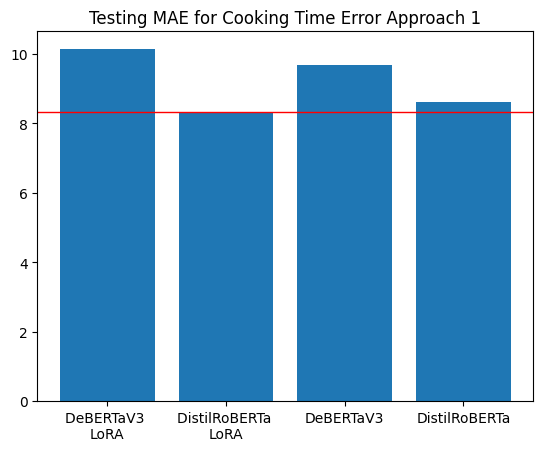

In [8]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nLoRA", "DistilRoBERTa \nLoRA", "DeBERTaV3", "DistilRoBERTa"])
y = np.array([10.13487, mean_absolute_error(groundtags, o2), mean_absolute_error(groundtags, o3), mean_absolute_error(groundtags, o4)])

plt.bar(x,y)
plt.title('Testing MAE for Cooking Time Error Approach 1')
# plt.ylim(0.995,1)
plt.axhline(y=min([10.13487, mean_absolute_error(groundtags, o2), mean_absolute_error(groundtags, o3), mean_absolute_error(groundtags, o4)]),linewidth=1, color='red')
plt.show()

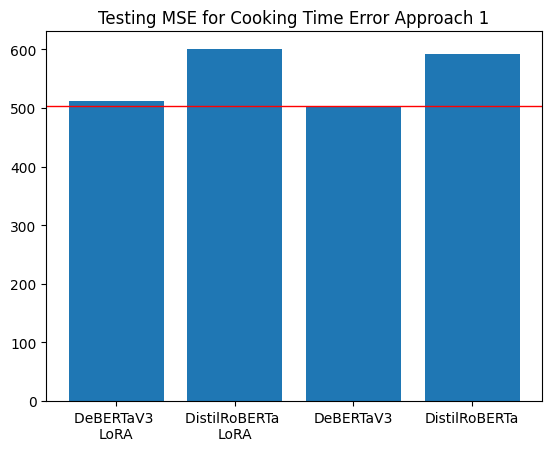

In [9]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nLoRA", "DistilRoBERTa \nLoRA", "DeBERTaV3", "DistilRoBERTa"])
y = np.array([512, mean_squared_error(groundtags, o2), mean_squared_error(groundtags, o3), mean_squared_error(groundtags, o4)])

plt.bar(x,y)
plt.title('Testing MSE for Cooking Time Error Approach 1')
# plt.ylim(0.995,1)
plt.axhline(y=min([512, mean_squared_error(groundtags, o2), mean_squared_error(groundtags, o3), mean_squared_error(groundtags, o4)]),linewidth=1, color='red')
plt.show()